In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [193]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [30]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# Cosine Smilarity

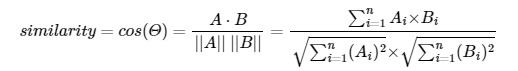

In [31]:
def cos_sim(x, y):
    # x, y의 내적의 곱을 x, y의 거리를 곱한 값으로 나누어준다.
    cs = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
    return cs

# scaling

In [32]:
X_train = X_train / 255.

In [46]:
X_train = tf.expand_dims(X_train, axis=-1)

# get embedding

In [86]:
m_input = tf.keras.layers.Input((28, 28, 1))
x = tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu')(m_input)
x = tf.keras.layers.MaxPooling2D((2, 2), 2)(x)
x = tf.keras.layers.Conv2D(16, 3, 1, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), 2)(x)
x = tf.keras.layers.Conv2D(32, 3, 1, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), 2)(x)
x = tf.keras.layers.Flatten()(x)
embedding = tf.keras.layers.Dense(128, activation='relu', name='embedding')(x)
x = tf.keras.layers.Dense(10)(embedding)

model = tf.keras.Model(inputs=m_input, outputs=x)

In [87]:
model.summary()

Model: "functional_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 32)         

In [88]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(True), 
              metrics=['accuracy'])

In [89]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 19s 21ms/step - loss: 0.2293 - accuracy: 0.9340
Epoch 2/10
938/938 [==============================] - 19s 21ms/step - loss: 0.0608 - accuracy: 0.9816
Epoch 3/10
938/938 [==============================] - 19s 21ms/step - loss: 0.0459 - accuracy: 0.9855
Epoch 4/10
938/938 [==============================] - 14s 15ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 5/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 6/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0250 - accuracy: 0.9919
Epoch 7/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 8/10
938/938 [==============================] - 14s 15ms/step - loss: 0.0184 - accuracy: 0.9938
Epoch 9/10
938/938 [==============================] - 19s 20ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 10/10
938/938 [==============================] - 19s 20ms/step - loss: 0.014

In [99]:
X_test = tf.expand_dims((X_test / 255.), axis=-1)

In [92]:
model.layers

In [93]:
embedding_model = tf.keras.Model(inputs=m_input, outputs=embedding)

In [100]:
X_test.shape

TensorShape([10000, 28, 28, 1])

In [101]:
preds = embedding_model(X_test)

In [102]:
preds.shape

TensorShape([10000, 128])

# Visualization

In [104]:
y_test.shape

(10000,)

In [105]:
y_test[0]

7

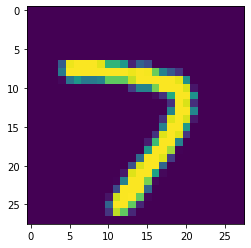

In [121]:
plt.imshow(X_test[17])

In [122]:
target = np.squeeze(preds[0])

sim_list = []

for proba in preds:
    # 7의 class를 갖는 vector와 비교
    prob = np.squeeze(proba)
    cs = cos_sim(target, prob)
    sim_list.append(cs)

In [123]:
sim_list[17], y_test[17]

(0.9801122, 7)

# index matching

1. 입력받은 이미지와 모든 예측치 간의 유사도를 비교.
2. 가장 유사도가 높은 이미지 임베딩 10개를 시각화

class number :  6


(<matplotlib.image.AxesImage at 0x17313290128>, None)

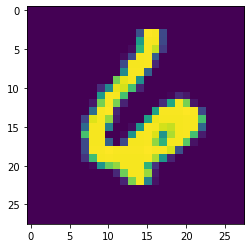

In [128]:
plt.imshow(X_train[449]), print('class number : ', y_train[449])

In [132]:
pred_input_image = tf.squeeze(embedding_model.predict(tf.reshape(X_train[449], (1, X_train.shape[1], X_train.shape[1], 1))))
pred_input_image.shape

TensorShape([128])

In [136]:
# 가장 높은 확률을 갖는 10가지 임베딩 값을 출력
preds = embedding_model(tf.expand_dims(X_test, axis=-1))

preds.shape

TensorShape([10000, 128])

In [226]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [227]:
target = np.squeeze(preds[0])

sim_list = []

for proba in preds:
    # 7의 class를 갖는 vector와 비교
    prob = np.squeeze(proba)
    cs = cos_sim(target, prob)
    sim_list.append(cs)
    
sim_list = np.array(sim_list)

# final predictions

In [223]:
pred_images, max_preds, preds_labels = [], [], []

imgs, sim_list, y_test = X_test[1:], sim_list[1:], y_test[1:]

for _ in range(10):
    max_index = np.argmax(sim_list)
    print(max_index)
    
    max_preds.append(sim_list[max_index])
    preds_labels.append(y_test[max_index])
    pred_images.append(imgs[max_index])
    
    sim_list = np.delete(sim_list, max_index)
    y_test = np.delete(y_test, max_index)
    
    print(imgs.shape)

493
(9999, 28, 28)
1782
(9999, 28, 28)
4797
(9999, 28, 28)
7140
(9999, 28, 28)
3159
(9999, 28, 28)
3396
(9999, 28, 28)
4044
(9999, 28, 28)
3076
(9999, 28, 28)
9279
(9999, 28, 28)
2871
(9999, 28, 28)


In [225]:
np.delete(imgs, 1).shape

(7839215,)

In [214]:
max_preds, preds_labels

([0.9907199,
  0.98993796,
  0.98692626,
  0.98330426,
  0.9832255,
  0.9816248,
  0.98157644,
  0.98144394,
  0.9810535,
  0.9808251],
 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7])